# Práctica 1: Estimación en Modelos de Regresión Lineales

##  Objetivos

1. Comprender el concepto de perturbación, residuo y la importancia de una buena especificación de un modelo econométrico.
2. Aprender a estimar un modelo econométrico.
3. Interpretación de los coeficientes estimados. 

Carguemos una base de datos de Greene "greene8_3"

In [109]:
import pandas as pd
datos= pd.read_excel ('greene8_3.xlsx')
datos

,year,q,k,A
0,1909,0.623,2.06,1.000
1,1910,0.616,2.10,0.983
2,1911,0.647,2.17,1.021
3,1912,0.652,2.21,1.023
4,1913,0.680,2.23,1.064
5,1914,0.682,2.20,1.071
6,1915,0.669,2.26,1.041
7,1916,0.700,2.34,1.076
8,1917,0.679,2.21,1.065
9,1918,0.729,2.22,1.142


Esta base de datos procede del estudio de Solow (1957) en relación con la función de producción. Contamos con información sobre  la producción agregada por trabajador/hora (q), un ratio sobre el capital agregado/trabajo (k) y un índice tecnologico (A).

In [111]:
y=datos['q']
X=sm.add_constant(datos[["k", "A"]])
k=datos["k"]
A=datos["A"]
years=datos['year']

In [63]:
import string
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt


## Estadísticos Descriptivos:

0.19881434995135389


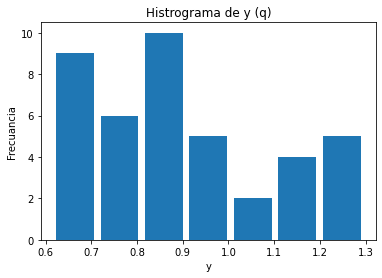

0.729 0.874 1.034 0.19881434995135389 0.9059756097560976


In [118]:
media=np.mean(y)
Q1=np.quantile(y, 0.25)
Q3=np.quantile(y, 0.75)
Varianza=np.var(y)
DesviacionTipica=np.std(y)
print(DesviacionTipica)
Mediana=np.median(y)
histograma=plt.hist(y, bins='auto', rwidth=0.85)
plt.xlabel('y')
plt.ylabel('Frecuancia')
plt.title("Histrograma de y (q)")
plt.show()
print(Q1, Mediana, Q3, DesviacionTipica, np.mean(y))

In [116]:
datos.describe()

,year,q,k,A
count,41.000000,41.000000,41.000000,41.000000
mean,1929.000000,0.905976,2.631463,1.324244
std,11.979149,0.201284,0.329815,0.267492
min,1909.000000,0.616000,2.060000,0.983000
25%,1919.000000,0.729000,2.470000,1.142000
50%,1929.000000,0.874000,2.630000,1.226000
75%,1939.000000,1.034000,2.810000,1.514000
max,1949.000000,1.296000,3.330000,1.850000


In [106]:
data.corr()

,year,q,k,A
year,1.000000,0.731709,0.483181,0.944230
q,0.731709,1.000000,-0.045896,0.857965
k,0.483181,-0.045896,1.000000,0.219015
A,0.944230,0.857965,0.219015,1.000000


Ahora ajustamos el modelo $y = X\beta + u$ y extraemos un resumen del resultado:

In [119]:
mco1 = sm.OLS(y, X).fit()
mco1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      q   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.230e+04
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           3.79e-54
Time:                        11:38:35   Log-Likelihood:                 140.77
No. Observations:                  41   AIC:                            -275.5
Df Residuals:                      38   BIC:                            -270.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2954      0.011    -26.527      0.000      -0.318      -0.273
k              0.0956      0.004     23.993      0.000       0.088       0.104
A              0.7172      0.005    145.954      0.000       0.707       0.727
==============================================================================
Omnibus:                        5.878   Durbin-Watson:                   1.023
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                6.972
Skew:                           0.278   Prob(JB):                       0.0306
Kurtosis:                       4.942   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos hacer un gráfico de la nube de puntos entre cada una de las variables explicativas y la explicada

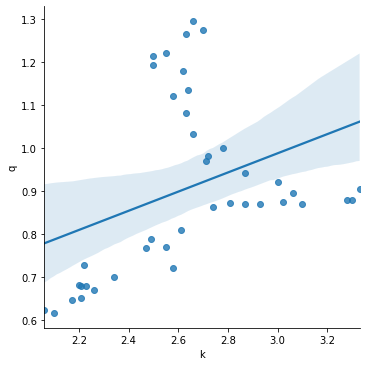

In [64]:
sns.lmplot(x="k", y="q", data=datos)

El modelo obtenido permite realizar algunas gráficas más que nos permitirán validar el modelo:

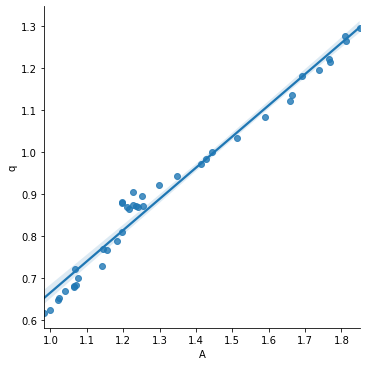

In [83]:
sns.lmplot(x="A", y="q", data=datos)

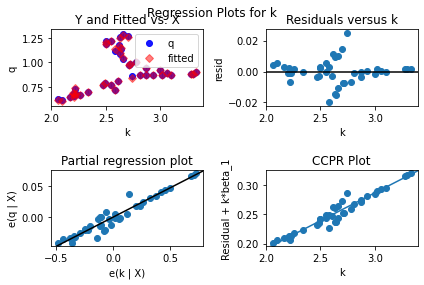

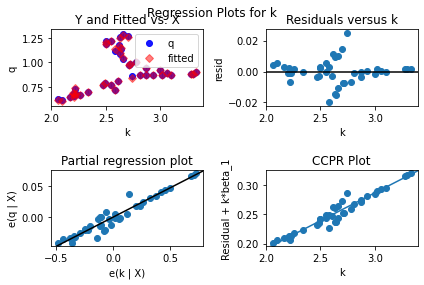

In [84]:
sm.graphics.plot_regress_exog(mco1, 'k')

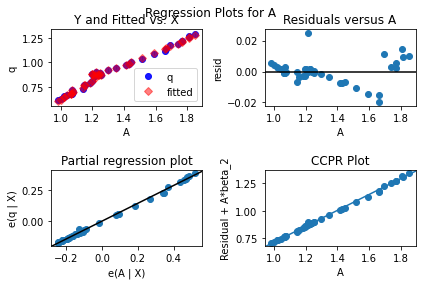

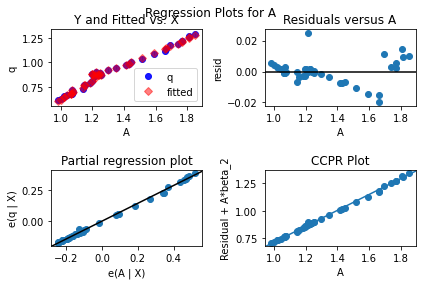

In [85]:
sm.graphics.plot_regress_exog(mco1, 'A')

Del modelo se pueden extraer otras medidas como:

* Valores predichos $\hat y$
* Residuos



In [121]:
yhat=mco1.fittedvalues
print(yhat)
e=mco1.resid
print(e)
np.mean(e)

0     0.618772
1     0.610404
2     0.644353
3     0.649612
4     0.680931
5     0.683083
6     0.667304
7     0.700057
8     0.679736
9     0.735919
10    0.770583
11    0.717986
12    0.770344
13    0.791144
14    0.811943
15    0.838001
16    0.872667
17    0.869081
18    0.870515
19    0.872666
20    0.894422
21    0.878641
22    0.902310
23    0.877446
24    0.869558
25    0.922394
26    0.946541
27    0.989576
28    0.978579
29    1.006789
30    1.044803
31    1.096444
32    1.141869
33    1.151192
34    1.168645
35    1.255669
36    1.285792
37    1.212397
38    1.190880
39    1.215743
40    1.260211
dtype: float64
0     0.004228
1     0.005596
2     0.002647
3     0.002388
4    -0.000931
5    -0.001083
6     0.001696
7    -0.000057
8    -0.000736
9    -0.006919
10   -0.003583
11    0.003014
12   -0.000344
13   -0.003144
14   -0.002943
15    0.024999
16   -0.000667
17   -0.000081
18    0.000485
19    0.001334
20    0.000578
21    0.001359
22    0.001690
23    0.001554
24   -0.00

2.3287604906771577e-16

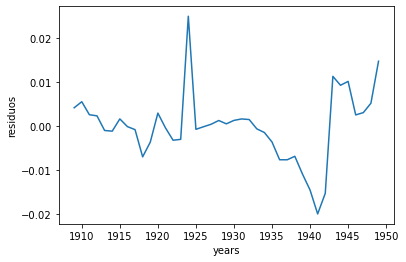

In [87]:
plt.plot(years, e)
plt.ylabel('residuos')
plt.xlabel('years')
plt.show()

## Importancia de una buena especificación.

Vamos a repetir el análisis anterior, pero sin incorporar la variable indice tecnologico, que se ha comprobado que es una variable especialmente relevante en el modelo. 

In [122]:
X1=sm.add_constant(datos[["k"]])
mco1 = sm.OLS(y, X1).fit()
mco1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      q   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     6.011
Date:                Tue, 12 Oct 2021   Prob (F-statistic):             0.0188
Time:                        11:43:39   Log-Likelihood:                 10.993
No. Observations:                  41   AIC:                            -17.99
Df Residuals:                      39   BIC:                            -14.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3191      0.241      1.323      0.194      -0.169       0.807
k              0.2230      0.091      2.452      0.019       0.039       0.407
==============================================================================
Omnibus:                        7.142   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.845
Skew:                           0.941   Prob(JB):                       0.0326
Kurtosis:                       2.316   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
yhat1=mco1.fittedvalues
e1=mco1.resid
print(e1)
np.mean(e1)

0    -0.155524
1    -0.171445
2    -0.156057
3    -0.159978
4    -0.136439
5    -0.127748
6    -0.154130
7    -0.140972
8    -0.132978
9    -0.085209
10   -0.102965
11   -0.173498
12   -0.117807
13   -0.086426
14   -0.092189
15   -0.067182
16   -0.073794
17   -0.090175
18   -0.101557
19   -0.118629
20   -0.106550
21   -0.175077
22   -0.157767
23   -0.171616
24   -0.141471
25   -0.067169
26   -0.016175
27    0.056278
28    0.047509
29    0.060897
30    0.121660
31    0.176351
32    0.227502
33    0.228121
34    0.276581
35    0.359351
36    0.383660
37    0.338344
38    0.317344
39    0.333193
40    0.353739
dtype: float64


-1.597638011045957e-16

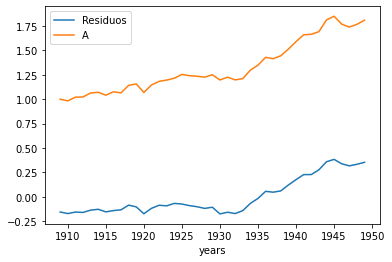

In [124]:
plt.plot(years, e1, label = "Residuos")
plt.plot(years, A, label = "A")
plt.xlabel('years')
plt.legend()
plt.show()